<a href="https://colab.research.google.com/github/msjulietruong/datathon-us-unsupervised/blob/main/CSULB_datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**



Within this notebook, we provided a step-by-step walkthrough of our analysis on the dataset provided by CSULB's AI x Data event held on Saturday, March 8th from 8 am to 10 pm. The Behavioral Risk Factor Surveillance System (BRFSS) provided insight into obesity, physical activity, and nutrition amongst adults within the United States, from 2011-2023.


# **Table of Contents**


0. Importing and Reading Data
1. Dataset Exploration and Cleaning
2. Feature Engineering
3. Unsupervised Learning Applications
4. Visualizing Models + Interpretation
5. Summary


# **Step 0: Importing Required Libraries**


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

# **1. Dataset Exploration and Cleaning**

Load the dataset and explore the dataset.

In [ ]:
# Load your dataset
df = pd.read_csv("train.csv")

In [ ]:
#First five rows of dataset
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q044,VALUE,2,Sex,Female,SEX,FEMALE
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q036,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,"(64.845079957001, -147.722059036)",OWS,OWS1,Q037,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525


In [ ]:
#dataset size
df.shape

(104272, 32)

In [ ]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104272 entries, 0 to 104271
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YearStart                   104272 non-null  int64  
 1   YearEnd                     104272 non-null  int64  
 2   LocationAbbr                104272 non-null  object 
 3   LocationDesc                104272 non-null  object 
 4   Datasource                  104272 non-null  object 
 5   Class                       104272 non-null  object 
 6   Topic                       104272 non-null  object 
 7   Question                    104272 non-null  object 
 8   Data_Value_Unit             88872 non-null   float64
 9   Data_Value_Type             104272 non-null  object 
 10  Data_Value                  93505 non-null   float64
 11  Data_Value_Alt              93505 non-null   float64
 12  Data_Value_Footnote_Symbol  10767 non-null   object 
 13  Data_Value_Foo

In [ ]:
#unique values of each column
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique(), "\n")

Column: YearStart
[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023] 

Column: YearEnd
[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023] 

Column: LocationAbbr
['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'US' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' 'PR' 'GU' 'VI'] 

Column: LocationDesc
['Alaska' 'Alabama' 'Arkansas' 'Arizona' 'California' 'Colorado'
 'Connecticut' 'District of Columbia' 'Delaware' 'Florida' 'Georgia'
 'Hawaii' 'Iowa' 'Idaho' 'Illinois' 'Indiana' 'Kansas' 'Kentucky'
 'Louisiana' 'Massachusetts' 'Maryland' 'Maine' 'Michigan' 'Minnesota'
 'Missouri' 'Mississippi' 'Montana' 'North Carolina' 'North Dakota'
 'Nebraska' 'New Hampshire' 'New Jersey' 'New Mexico' 'Nevada' 'New York'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 

Figuring out if YearStart and YearEnd are the same.


In [ ]:
df['YearStart'].unique()
df['YearEnd'].unique()
df['Duration'] = df['YearEnd'] - df['YearStart']
print(df['Duration'].unique())

[0]


In [ ]:
unique_differences = (df['Data_Value_Unit'] - df['YearEnd']).unique()
print(unique_differences)

[ 0. nan]


In [ ]:
nan_rows = df[df['Data_Value_Unit'].isna()]
nan_rows.head()
print(nan_rows['YearStart'].unique())

[2022 2023]


 Checks for the unique values in the **Data_Value** column where the **Data_Value_Footnote** mentions that the data is not available due to insufficient sample size and view the selected columns.

In [ ]:
df.loc[df['Data_Value_Footnote'] == 'Data not available because sample size is insufficient.']['Data_Value'].unique()
df[['Education','Sex','Age(years)', 'Income', 'Race/Ethnicity', 'StratificationCategory1', 'Stratification1']]

,Education,Sex,Age(years),Income,Race/Ethnicity,StratificationCategory1,Stratification1
0,NaN,NaN,NaN,NaN,2 or more races,Race/Ethnicity,2 or more races
1,NaN,NaN,NaN,NaN,Other,Race/Ethnicity,Other
2,NaN,Female,NaN,NaN,NaN,Sex,Female
3,NaN,NaN,35 - 44,NaN,NaN,Age (years),35 - 44
4,NaN,NaN,NaN,"$15,000 - $24,999",NaN,Income,"$15,000 - $24,999"
...,...,...,...,...,...,...,...
104267,High school graduate,NaN,NaN,NaN,NaN,Education,High school graduate
104268,NaN,NaN,65 or older,NaN,NaN,Age (years),65 or older
104269,NaN,NaN,NaN,Data not reported,NaN,Income,Data not reported
104270,Less than high school,NaN,NaN,NaN,NaN,Education,Less than high school


In [ ]:
df.loc[(df['LocationDesc'] == 'Alaska') & (df['Stratification1'] == '2 or more races') & (df['Class'] == 'Obesity / Weight Status')]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Duration
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,0
82,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,OWS,OWS1,Q037,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,0
10224,2012,2012,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2012.0,Value,...,OWS,OWS1,Q037,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,0
10246,2012,2012,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2012.0,Value,...,OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,0
14576,2013,2013,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2013.0,Value,...,OWS,OWS1,Q037,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,0
14578,2013,2013,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2013.0,Value,...,OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,0
24853,2014,2014,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2014.0,Value,...,OWS,OWS1,Q037,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,0
24863,2014,2014,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2014.0,Value,...,OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,0
29455,2015,2015,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2015.0,Value,...,OWS,OWS1,Q037,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,0
29486,2015,2015,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2015.0,Value,...,OWS,OWS1,Q036,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,0


Replaces **QuestionID** with numerical values to help with training our model. Applied label encoding!

In [ ]:
df['QuestionID'] = df['QuestionID'].replace('Q036', 1)
df['QuestionID'] = df['QuestionID'].replace('Q044', 2)
df['QuestionID'] = df['QuestionID'].replace('Q037', 3)
df['QuestionID'] = df['QuestionID'].replace('Q046', 4)
df['QuestionID'] = df['QuestionID'].replace('Q047', 5)
df['QuestionID'] = df['QuestionID'].replace('Q043', 6)
df['QuestionID'] = df['QuestionID'].replace('Q045',7)
df['QuestionID'] = df['QuestionID'].replace('Q018', 8)
df['QuestionID'] = df['QuestionID'].replace('Q019', 9)
df.head()

<ipython-input-12-de59adb4e9a7>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['QuestionID'] = df['QuestionID'].replace('Q019', 9)


,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Duration
0,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,OWS,OWS1,1,VALUE,2,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,0
1,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,OWS,OWS1,1,VALUE,2,Race/Ethnicity,Other,RACE,RACEOTH,0
2,2011,2011,AK,Alaska,BRFSS,Physical Activity,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,2011.0,Value,...,PA,PA1,2,VALUE,2,Sex,Female,SEX,FEMALE,0
3,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,OWS,OWS1,1,VALUE,2,Age (years),35 - 44,AGEYR,AGEYR3544,0
4,2011,2011,AK,Alaska,BRFSS,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,2011.0,Value,...,OWS,OWS1,3,VALUE,2,Income,"$15,000 - $24,999",INC,INC1525,0


**Drop** rows where there was not a sufficient sample size and then drop unncessary columns we do not need for our data analysis.

In [ ]:
# Drop rows where 'Data_Value_Footnote' contains "Data not available because sample size is insufficient"
df = df[df['Data_Value_Footnote'].isna() | (df['Data_Value_Footnote'] == '')]

# List of columns to drop
columns_to_drop = [
    'YearEnd', 'LocationAbbr', 'Datasource', 'Data_Value_Type', 'Data_Value_Alt',
    'Data_Value_Footnote_Symbol','Data_Value_Footnote', 'GeoLocation', 'Education', 'Sex', 'Age(years)',
    'Income', 'Race/Ethnicity', 'ClassID', 'TopicID',
    'DataValueTypeID', 'StratificationCategoryId1', 'StratificationID1',
    'Data_Value_Unit', 'Topic', 'Duration'
]
# Drop the columns
df = df.drop(columns=columns_to_drop)

# Check the resulting dataframe
df.head()


,YearStart,LocationDesc,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,LocationID,StratificationCategory1,Stratification1
0,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,23.3,16.1,32.4,128.0,1,2,Race/Ethnicity,2 or more races
1,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.5,22.7,50.9,63.0,1,2,Race/Ethnicity,Other
2,2011,Alaska,Physical Activity,Percent of adults who achieve at least 150 min...,21.7,19.1,24.6,1702.0,2,2,Sex,Female
3,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.5,24.5,35.0,562.0,1,2,Age (years),35 - 44
4,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.5,26.2,41.7,377.0,3,2,Income,"$15,000 - $24,999"


Making sure we dont have any more **null** values in our data :D

In [ ]:
#check for any more null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93505 entries, 0 to 104271
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearStart                93505 non-null  int64  
 1   LocationDesc             93505 non-null  object 
 2   Class                    93505 non-null  object 
 3   Question                 93505 non-null  object 
 4   Data_Value               93505 non-null  float64
 5   Low_Confidence_Limit     93505 non-null  float64
 6   High_Confidence_Limit    93505 non-null  float64
 7   Sample_Size              93505 non-null  float64
 8   QuestionID               93505 non-null  int64  
 9   LocationID               93505 non-null  int64  
 10  StratificationCategory1  93505 non-null  object 
 11  Stratification1          93505 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 9.3+ MB


# **2. Feature Engineering**

Getting the unqiue values of the class column (the type of question)

**One Hot Encoding** is a method for converting categorical variables into a binary format. It creates new columns for each category where 1 means the category is present and 0 means it is not in order train our model.

Get the values for **StratificationCategory1** column

In [ ]:
df['StratificationCategory1'].unique()

array(['Race/Ethnicity', 'Sex', 'Age (years)', 'Income', 'Education',
       'Total'], dtype=object)

Apply One Hot Encoding to our demographics and add it to our dataset while dropping the **StratificationCategory1**

In [ ]:
df_stratification_category = pd.get_dummies(df['StratificationCategory1'])
df_stratification_category.drop(columns='Total', inplace=True)
df_stratification_category.head()
df = pd.concat([df, df_stratification_category], axis=1)
df.drop(columns='StratificationCategory1', inplace=True)
df.head()

,YearStart,LocationDesc,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,LocationID,Stratification1,Age (years),Education,Income,Race/Ethnicity,Sex
0,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,23.3,16.1,32.4,128.0,1,2,2 or more races,False,False,False,True,False
1,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.5,22.7,50.9,63.0,1,2,Other,False,False,False,True,False
2,2011,Alaska,Physical Activity,Percent of adults who achieve at least 150 min...,21.7,19.1,24.6,1702.0,2,2,Female,False,False,False,False,True
3,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.5,24.5,35.0,562.0,1,2,35 - 44,True,False,False,False,False
4,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.5,26.2,41.7,377.0,3,2,"$15,000 - $24,999",False,False,True,False,False


In [ ]:
df['Stratification1'].unique()

array(['2 or more races', 'Other', 'Female', '35 - 44',
       '$15,000 - $24,999', 'Male', 'Less than high school', '25 - 34',
       'Non-Hispanic White', 'Some college or technical school',
       '18 - 24', '$50,000 - $74,999', 'High school graduate',
       '$75,000 or greater', 'American Indian/Alaska Native',
       'College graduate', 'Hispanic', 'Less than $15,000', '55 - 64',
       '65 or older', 'Total', '$25,000 - $34,999', '45 - 54',
       'Data not reported', '$35,000 - $49,999', 'Non-Hispanic Black',
       'Asian', 'Hawaiian/Pacific Islander'], dtype=object)

Apply One Hot Encoding to our demographics and add it to our dataset while dropping the Stratification1

In [ ]:
df_stratification = pd.get_dummies(df['Stratification1'])
df = pd.concat([df, df_stratification], axis=1)
df.drop(columns='Stratification1', inplace=True)
df.head()

,YearStart,LocationDesc,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,LocationID,...,High school graduate,Hispanic,"Less than $15,000",Less than high school,Male,Non-Hispanic Black,Non-Hispanic White,Other,Some college or technical school,Total
0,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,23.3,16.1,32.4,128.0,1,2,...,False,False,False,False,False,False,False,False,False,False
1,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,35.5,22.7,50.9,63.0,1,2,...,False,False,False,False,False,False,False,True,False,False
2,2011,Alaska,Physical Activity,Percent of adults who achieve at least 150 min...,21.7,19.1,24.6,1702.0,2,2,...,False,False,False,False,False,False,False,False,False,False
3,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,29.5,24.5,35.0,562.0,1,2,...,False,False,False,False,False,False,False,False,False,False
4,2011,Alaska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.5,26.2,41.7,377.0,3,2,...,False,False,False,False,False,False,False,False,False,False


Checking our data types to prevent issues when modeling.

In [ ]:
df.dtypes

,0
YearStart,int64
LocationDesc,object
Class,object
Question,object
Data_Value,float64
Low_Confidence_Limit,float64
High_Confidence_Limit,float64
Sample_Size,float64
QuestionID,int64
LocationID,int64


# **3. Modeling/Visulization**

Processing Class: Obesity / Weight Status with 5 clusters



<ipython-input-20-444313f50159>:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


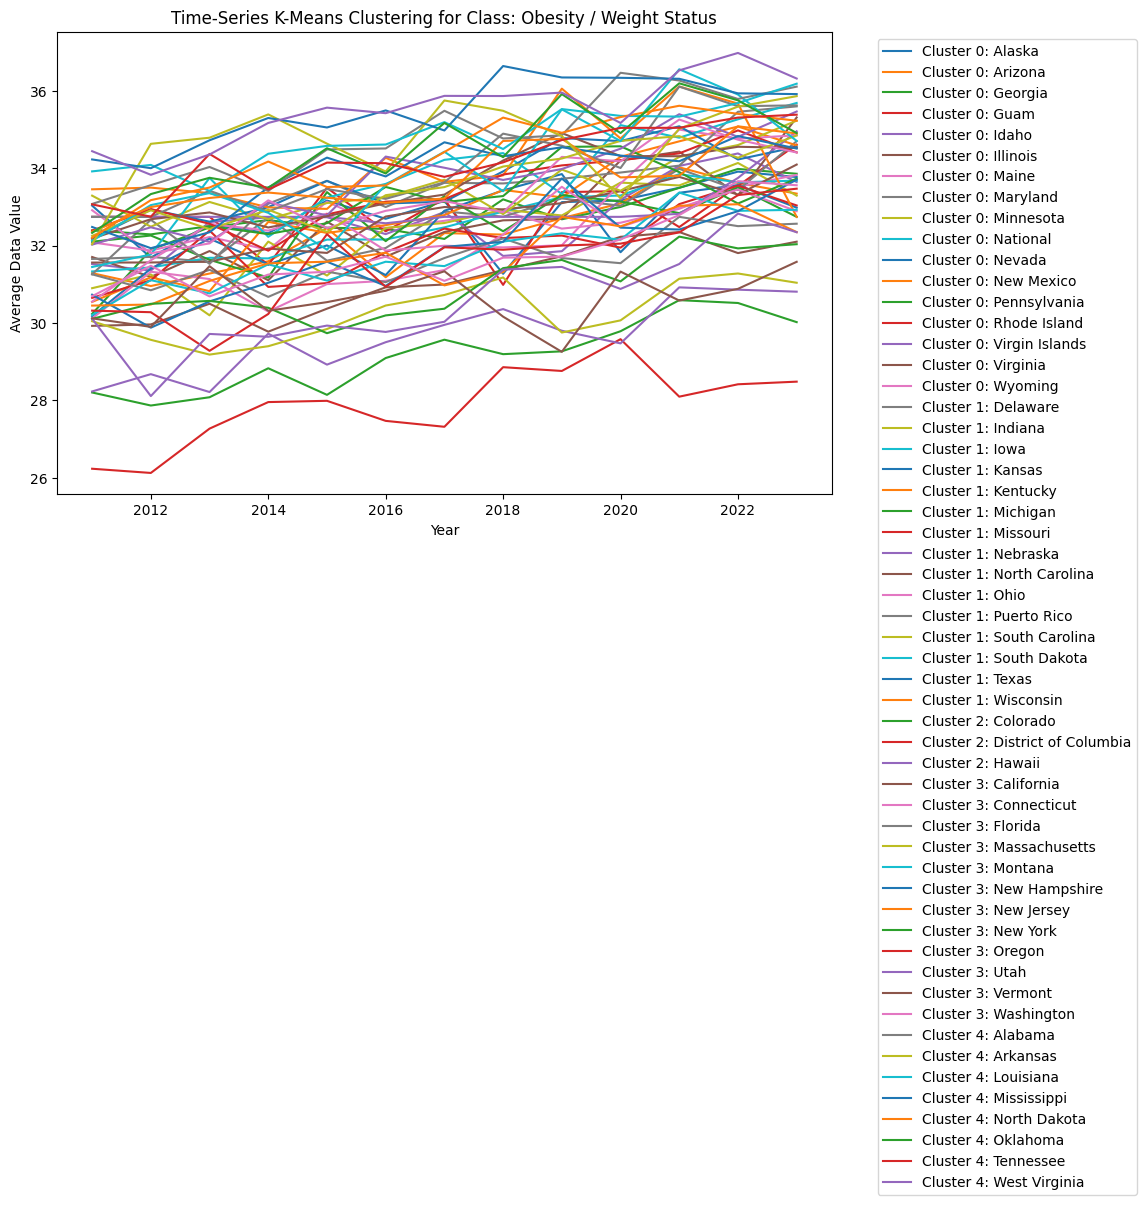

Cluster Centers for Obesity / Weight Status:
[[31.45893242 31.64424205 31.94623384 31.97499075 32.42121444 32.15202052
  32.69298021 32.50695176 32.86032382 33.14953407 33.63930254 33.82239353
  33.95720836]
 [32.36520284 32.61116347 32.74814895 32.82705523 33.01513089 33.40740307
  33.63851656 33.8510825  34.48740224 34.34352719 34.87097628 34.87114
  34.72794892]
 [27.55382241 27.55424691 27.8534359  28.83495157 28.34975973 28.68750522
  28.94401709 29.46876163 29.27393162 29.61211301 29.86737322 29.92966667
  29.77002089]
 [30.33858377 30.28379962 30.52541951 30.50537954 30.88516998 30.9420695
  31.16157603 31.58790705 31.7919621  31.74335884 32.29038656 32.54112381
  32.54647862]
 [33.16160403 33.66947952 34.11576628 34.34504241 34.56070212 34.43725153
  35.0789745  35.12459273 35.38355783 35.22682535 35.78909513 35.8057661
  35.73799596]]

Cluster Labels for Each Region:
                      Cluster
LocationDesc                 
Alabama                     4
Alaska               

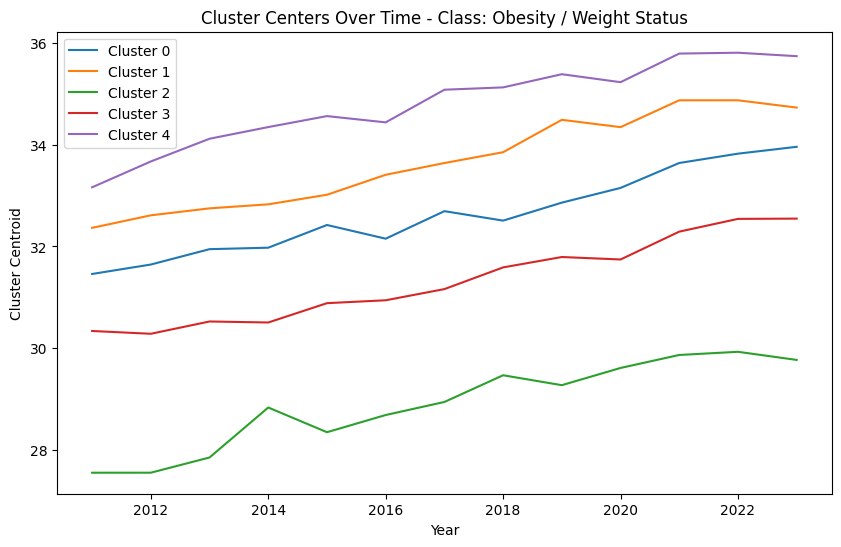

Processing Class: Physical Activity with 5 clusters



<ipython-input-20-444313f50159>:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


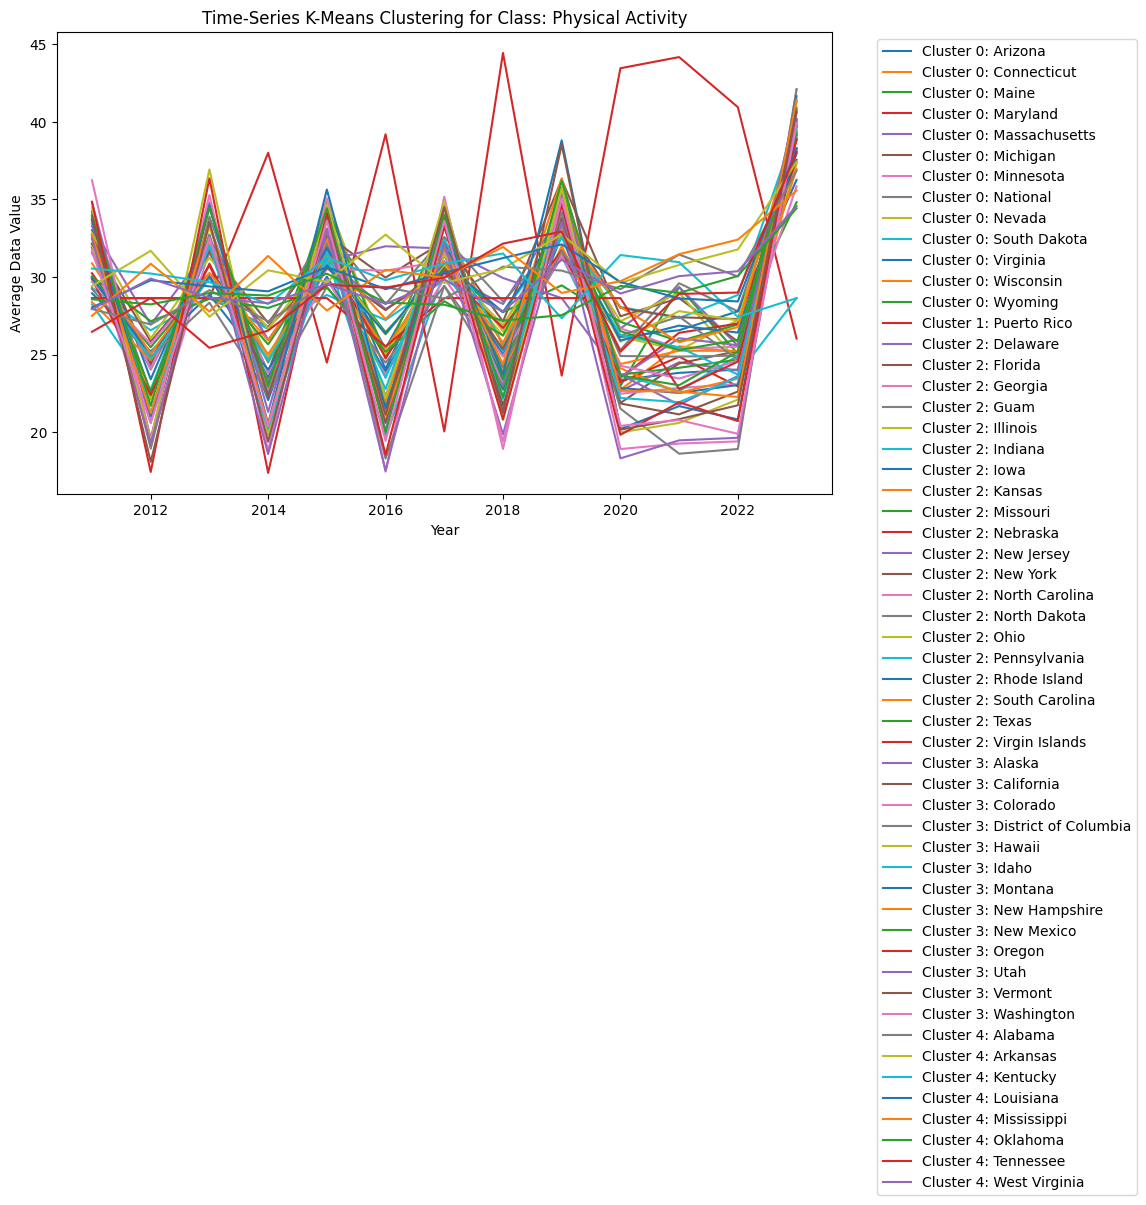

Cluster Centers for Physical Activity:
[[32.05530786 22.95955042 32.0873889  23.18959472 32.56663598 23.36518454
  31.80005837 24.44678509 33.56746301 23.43910411 24.40889225 24.43812829
  39.246959  ]
 [28.63737215 28.63737215 28.63737215 38.0047619  24.48095238 39.2
  20.04       44.44285714 23.64095238 43.45714286 44.17619048 40.94761905
  26.02952381]
 [30.50752245 25.38156379 30.26830596 25.29084346 30.7024171  26.57219036
  30.68785989 26.67389562 32.32530876 26.28813834 26.58462473 26.08712347
  37.82829098]
 [33.91965135 19.89013189 34.24187441 20.40965028 33.95552757 20.03683761
  33.46806376 21.50711036 35.59383215 21.02631198 21.04626463 21.56712426
  40.81310776]
 [28.29755372 29.53255449 28.30840302 28.73768196 29.77452357 29.68513629
  29.66468527 30.37544474 30.39283432 29.14795659 30.14967818 29.93612221
  35.47520618]]

Cluster Labels for Each Region:
                      Cluster
LocationDesc                 
Alabama                     4
Alaska                      3

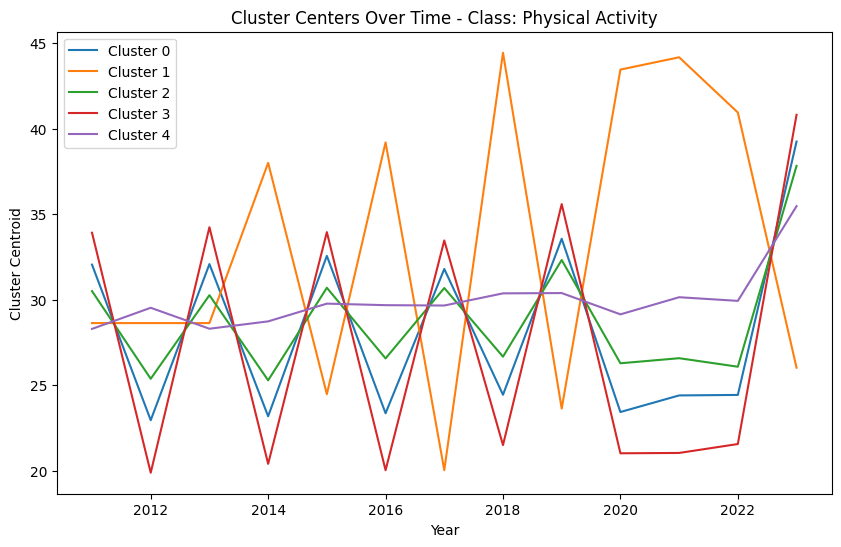

Processing Class: Fruits and Vegetables with 5 clusters



<ipython-input-20-444313f50159>:65: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


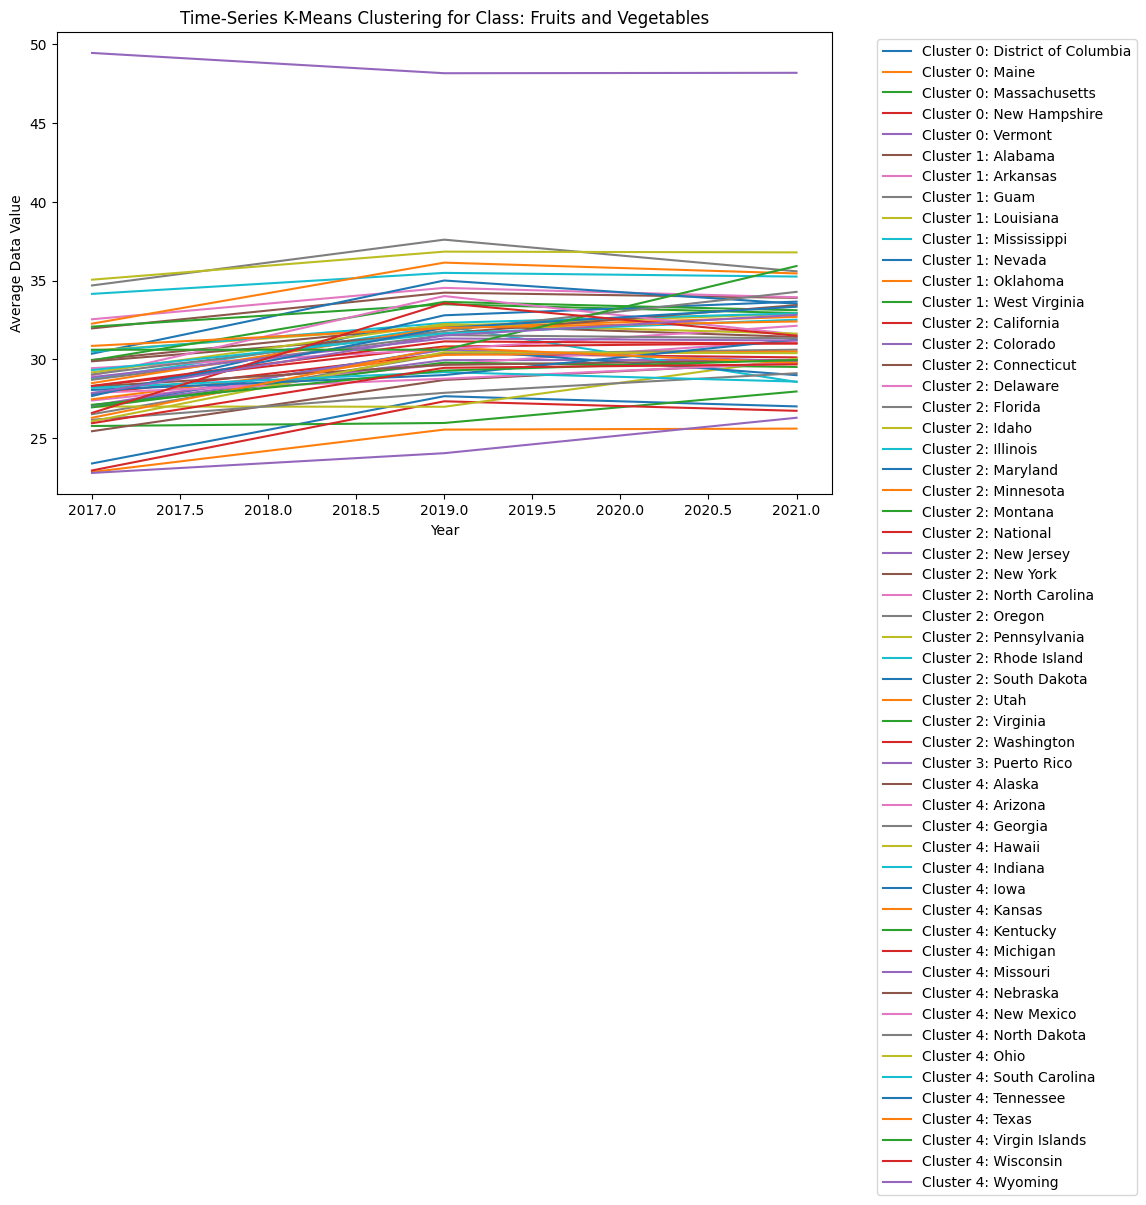

Cluster Centers for Fruits and Vegetables:
[[23.53591996 26.09782699 26.70985   ]
 [32.88279859 35.41234598 34.67007292]
 [27.1674677  29.73842194 29.92919654]
 [49.4547619  48.16666667 48.19285714]
 [29.11781239 32.03128989 32.58580132]]

Cluster Labels for Each Region:
                      Cluster
LocationDesc                 
Alabama                     1
Alaska                      4
Arizona                     4
Arkansas                    1
California                  2
Colorado                    2
Connecticut                 2
Delaware                    2
District of Columbia        0
Florida                     2
Georgia                     4
Guam                        1
Hawaii                      4
Idaho                       2
Illinois                    2
Indiana                     4
Iowa                        4
Kansas                      4
Kentucky                    4
Louisiana                   1
Maine                       0
Maryland                    2
Massachu

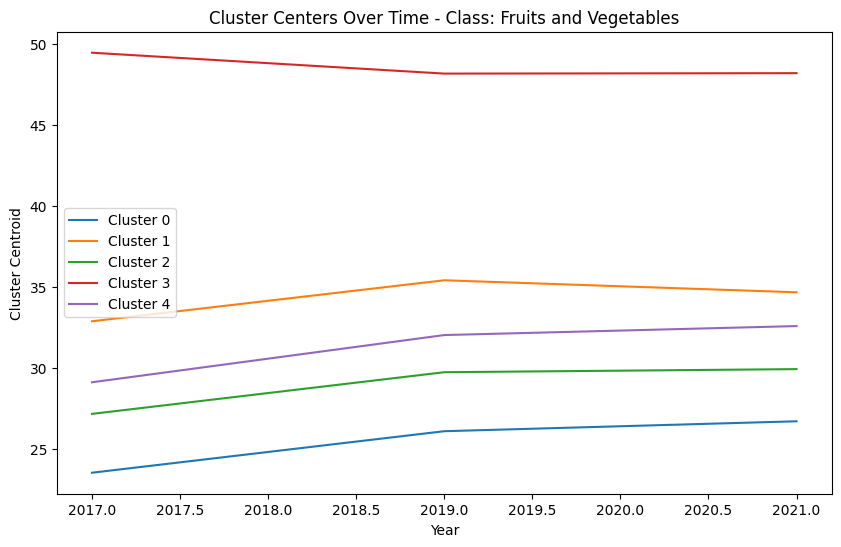

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Ensure df is loaded
if 'df' in locals():
    # Group by YearStart, LocationDesc (Region), and Class, and take the average of Data_Value for each combination
    df_grouped = df.groupby(['YearStart', 'LocationDesc', 'Class'], as_index=False).agg({
        'Data_Value': 'mean',
        'Low_Confidence_Limit': 'mean',
        'High_Confidence_Limit ': 'mean'
    })

    # Create separate DataFrames for each class
    df_obesity = df_grouped[df_grouped['Class'] == 'Obesity / Weight Status']
    df_activity = df_grouped[df_grouped['Class'] == 'Physical Activity']
    df_nutrition = df_grouped[df_grouped['Class'] == 'Fruits and Vegetables']

    # Create pivot tables separately
    pivot_data_obesity = df_obesity.pivot_table(index='YearStart', columns='LocationDesc', values='Data_Value').fillna(df_obesity['Data_Value'].mean())
    pivot_data_activity = df_activity.pivot_table(index='YearStart', columns='LocationDesc', values='Data_Value').fillna(df_activity['Data_Value'].mean())
    pivot_data_nutrition = df_nutrition.pivot_table(index='YearStart', columns='LocationDesc', values='Data_Value').fillna(df_nutrition['Data_Value'].mean())

    # Dictionary to store pivot tables
    pivot_data_by_class = {
        "Obesity / Weight Status": pivot_data_obesity,
        "Physical Activity": pivot_data_activity,
        "Fruits and Vegetables": pivot_data_nutrition
    }

    # Dictionary to store cluster labels for each class
    cluster_labels_by_class = {}

    # Define number of clusters per class
    cluster_numbers = {
        "Obesity / Weight Status": 5,
        "Physical Activity": 5,
        "Fruits and Vegetables": 5
    }

    # Loop over each class and perform clustering
    for class_label, pivot_data in pivot_data_by_class.items():
        print(f"Processing Class: {class_label} with {cluster_numbers[class_label]} clusters\n")

        # Apply K-means clustering
        kmeans_ts = KMeans(n_clusters=cluster_numbers[class_label], random_state=42)
        clusters = kmeans_ts.fit_predict(pivot_data.T)

        # Store cluster labels
        cluster_labels = pd.DataFrame(clusters, index=pivot_data.columns, columns=['Cluster'])
        cluster_labels_by_class[class_label] = cluster_labels

        # Visualize clusters
        plt.figure(figsize=(10, 6))
        for cluster in np.unique(clusters):
            subset_columns = cluster_labels[cluster_labels["Cluster"] == cluster].index
            for region in subset_columns:
                plt.plot(pivot_data.index, pivot_data[region], label=f'Cluster {cluster}: {region}')

        plt.xlabel('Year')
        plt.ylabel('Average Data Value')
        plt.title(f'Time-Series K-Means Clustering for Class: {class_label}')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

        print(f"Cluster Centers for {class_label}:")
        print(kmeans_ts.cluster_centers_)

        print("\nCluster Labels for Each Region:")
        print(cluster_labels)
        print("\n" + "="*50 + "\n")

        # Plot cluster centers over time
        plt.figure(figsize=(10, 6))
        for i, center in enumerate(kmeans_ts.cluster_centers_):
            plt.plot(pivot_data.index, center, label=f'Cluster {i}')

        plt.xlabel('Year')
        plt.ylabel('Cluster Centroid')
        plt.title(f'Cluster Centers Over Time - Class: {class_label}')
        plt.legend()
        plt.show()
else:
    print("Dataset 'df' is not loaded. Please upload your dataset.")


Choosing number of  clusters:

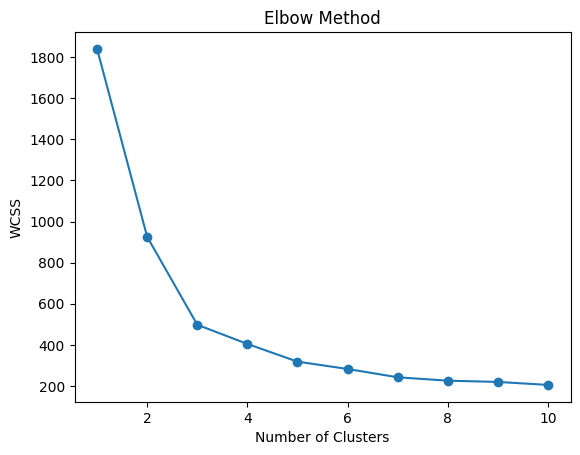

In [ ]:
wcss = []
for k in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pivot_data_obesity.T)  # Transpose for clustering rows
    wcss.append(kmeans.inertia_)  # inertia_ gives WCSS for the current cluster

# Plot WCSS
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


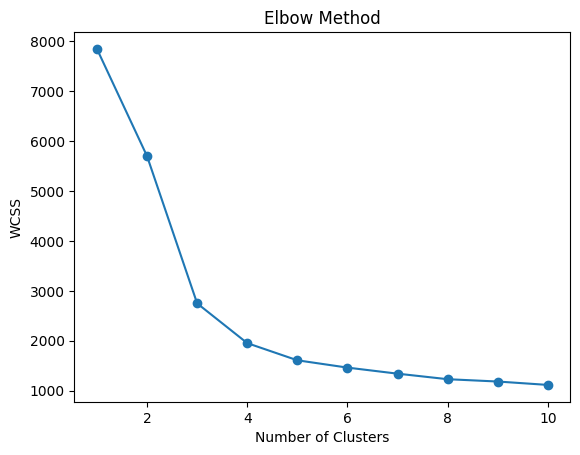

In [ ]:
wcss = []
for k in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pivot_data_activity.T)  # Transpose for clustering rows
    wcss.append(kmeans.inertia_)  # inertia_ gives WCSS for the current cluster

# Plot WCSS
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


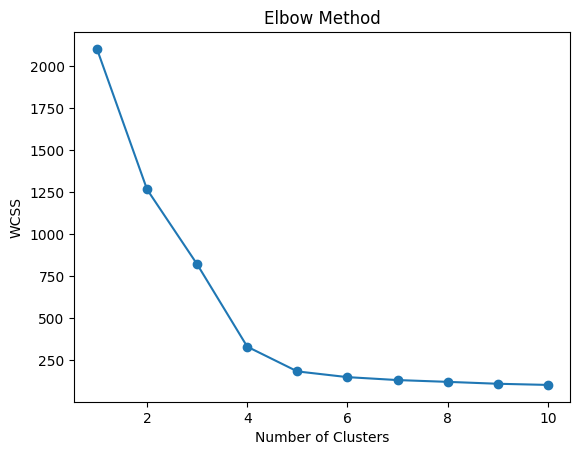

In [ ]:
wcss = []
for k in range(1, 11):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pivot_data_nutrition.T)  # Transpose for clustering rows
    wcss.append(kmeans.inertia_)  # inertia_ gives WCSS for the current cluster

# Plot WCSS
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


K-Medoid Approach:

In [ ]:
import pandas as pd

# Ensure df is loaded before processing
if 'df' in locals():
    # Group by YearStart, LocationDesc (Region), and Class, taking the median of Data_Value
    df_grouped = df.groupby(['YearStart', 'LocationDesc', 'Class'], as_index=False).agg({
        'Data_Value': 'median',
        'Low_Confidence_Limit': 'median',
        'High_Confidence_Limit ': 'median'
    })

    # Create separate pivot tables for each class
    pivot_data_by_class = {}
    unique_classes = df_grouped['Class'].unique()

    for class_label in unique_classes:
        class_data = df_grouped[df_grouped['Class'] == class_label]
        pivot_data = class_data.pivot_table(index='YearStart', columns='LocationDesc', values='Data_Value')
        pivot_data = pivot_data.fillna(pivot_data.median())  # Fill missing values with median
        pivot_data_by_class[class_label] = pivot_data

    print("Pivot tables created for each class.")
else:
    print("Dataset 'df' is not loaded. Please upload your dataset.")


Pivot tables created for each class.


Processing Class: Obesity / Weight Status



<ipython-input-25-151633740778>:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


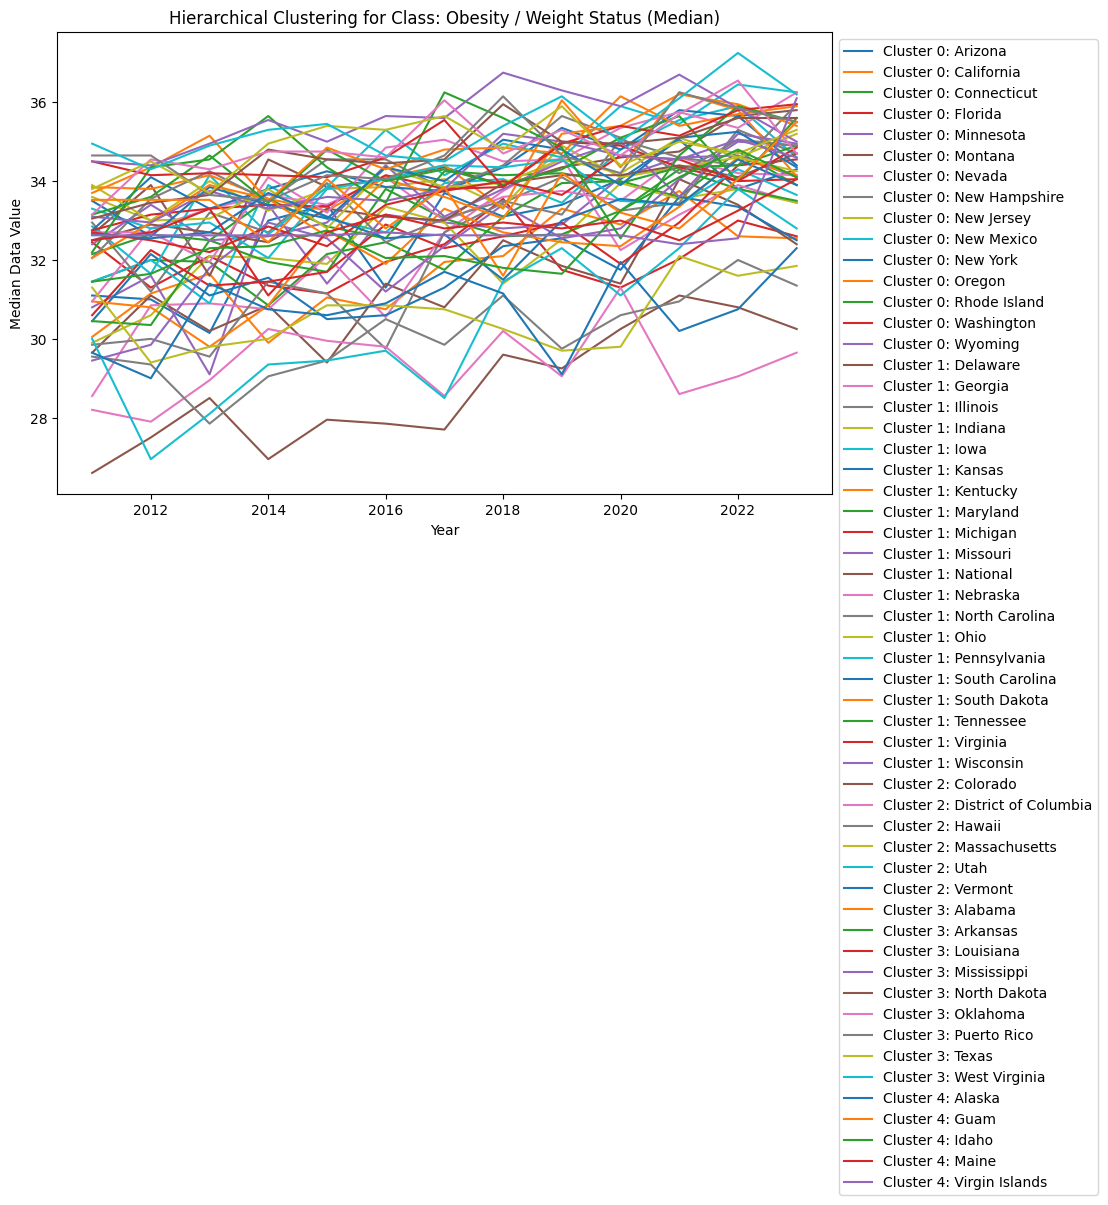

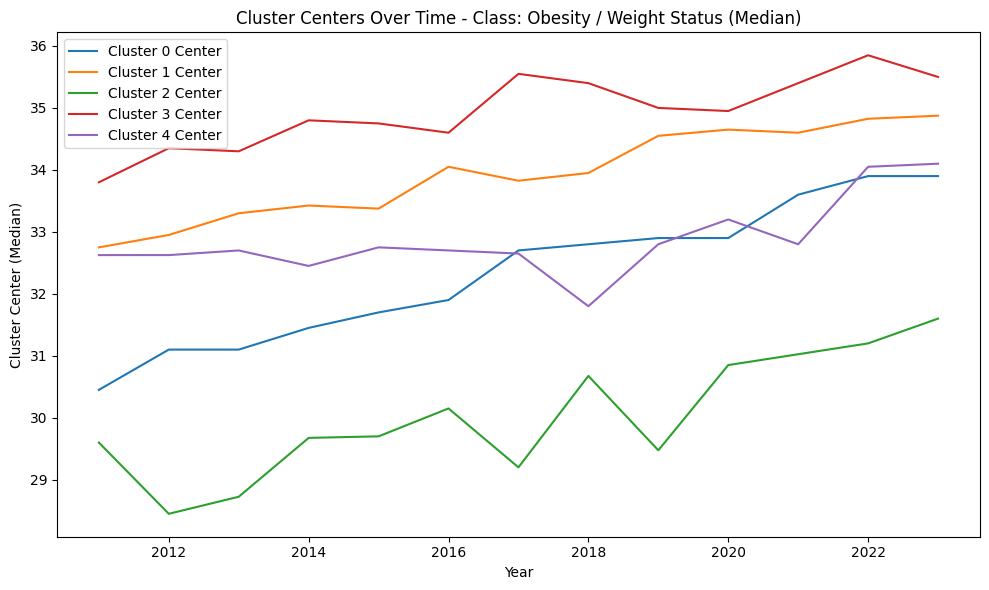

Cluster Centers for Obesity / Weight Status:
[[30.45  31.1   31.1   31.45  31.7   31.9   32.7   32.8   32.9   32.9
  33.6   33.9   33.9  ]
 [32.75  32.95  33.3   33.425 33.375 34.05  33.825 33.95  34.55  34.65
  34.6   34.825 34.875]
 [29.6   28.45  28.725 29.675 29.7   30.15  29.2   30.675 29.475 30.85
  31.025 31.2   31.6  ]
 [33.8   34.35  34.3   34.8   34.75  34.6   35.55  35.4   35.    34.95
  35.4   35.85  35.5  ]
 [32.625 32.625 32.7   32.45  32.75  32.7   32.65  31.8   32.8   33.2
  32.8   34.05  34.1  ]]

Cluster Labels for Each Region:
                      Cluster
LocationDesc                 
Alabama                     3
Alaska                      4
Arizona                     0
Arkansas                    3
California                  0
Colorado                    2
Connecticut                 0
Delaware                    1
District of Columbia        2
Florida                     0
Georgia                     1
Guam                        4
Hawaii                      

<ipython-input-25-151633740778>:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


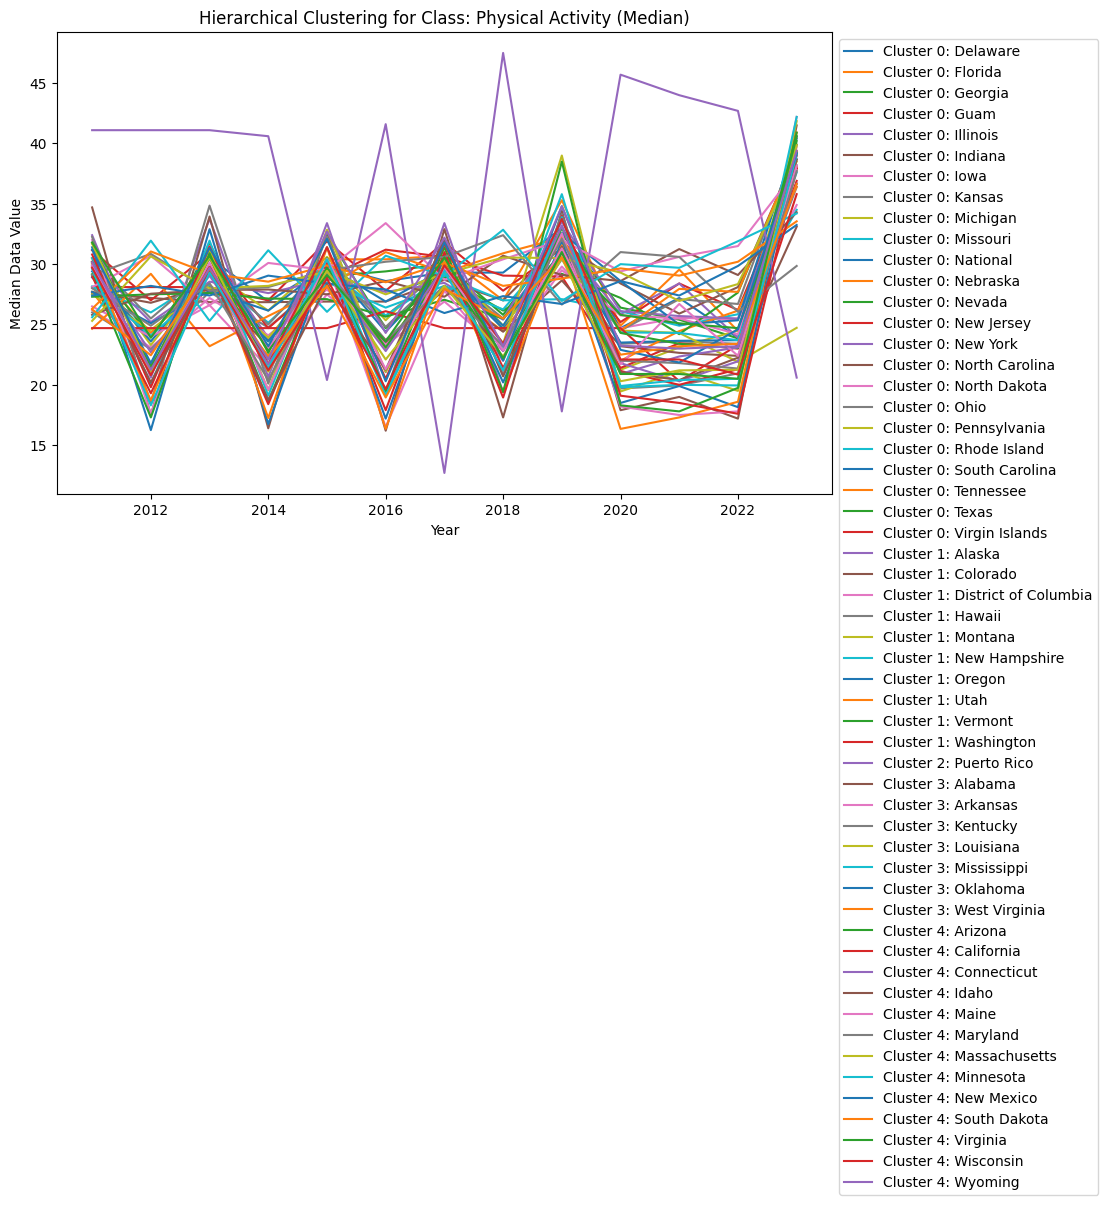

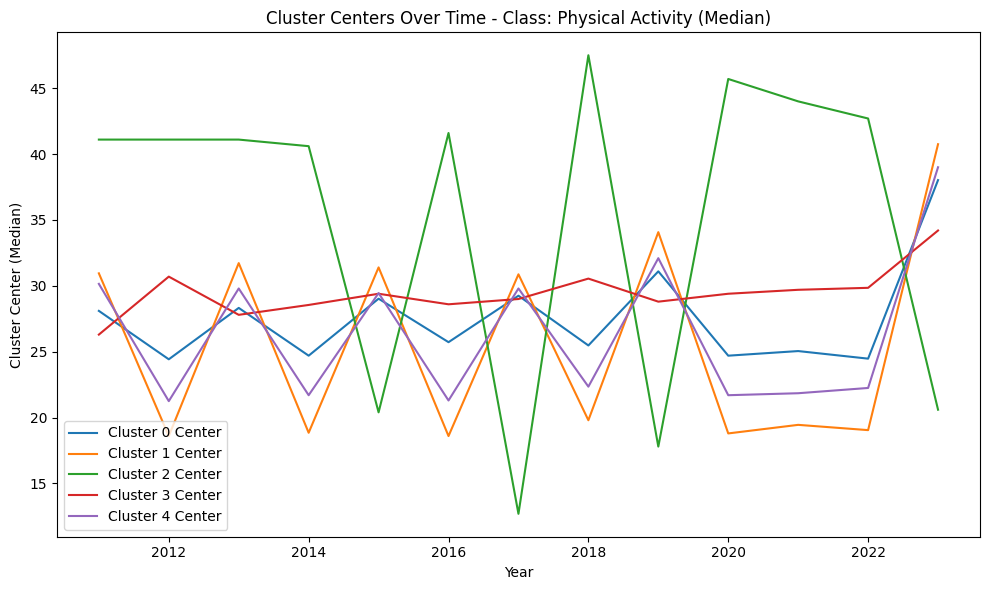

Cluster Centers for Physical Activity:
[[28.1   24.425 28.325 24.7   29.025 25.725 29.25  25.475 31.1   24.7
  25.05  24.475 38.025]
 [30.95  18.6   31.725 18.85  31.4   18.6   30.875 19.8   34.075 18.8
  19.45  19.05  40.75 ]
 [41.1   41.1   41.1   40.6   20.4   41.6   12.7   47.5   17.8   45.7
  44.    42.7   20.6  ]
 [26.3   30.7   27.8   28.55  29.4   28.6   29.    30.55  28.8   29.4
  29.7   29.85  34.2  ]
 [30.15  21.25  29.8   21.7   29.45  21.3   29.8   22.35  32.1   21.7
  21.85  22.25  39.   ]]

Cluster Labels for Each Region:
                      Cluster
LocationDesc                 
Alabama                     3
Alaska                      1
Arizona                     4
Arkansas                    3
California                  4
Colorado                    1
Connecticut                 4
Delaware                    0
District of Columbia        1
Florida                     0
Georgia                     0
Guam                        0
Hawaii                      1
Idaho  

<ipython-input-25-151633740778>:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


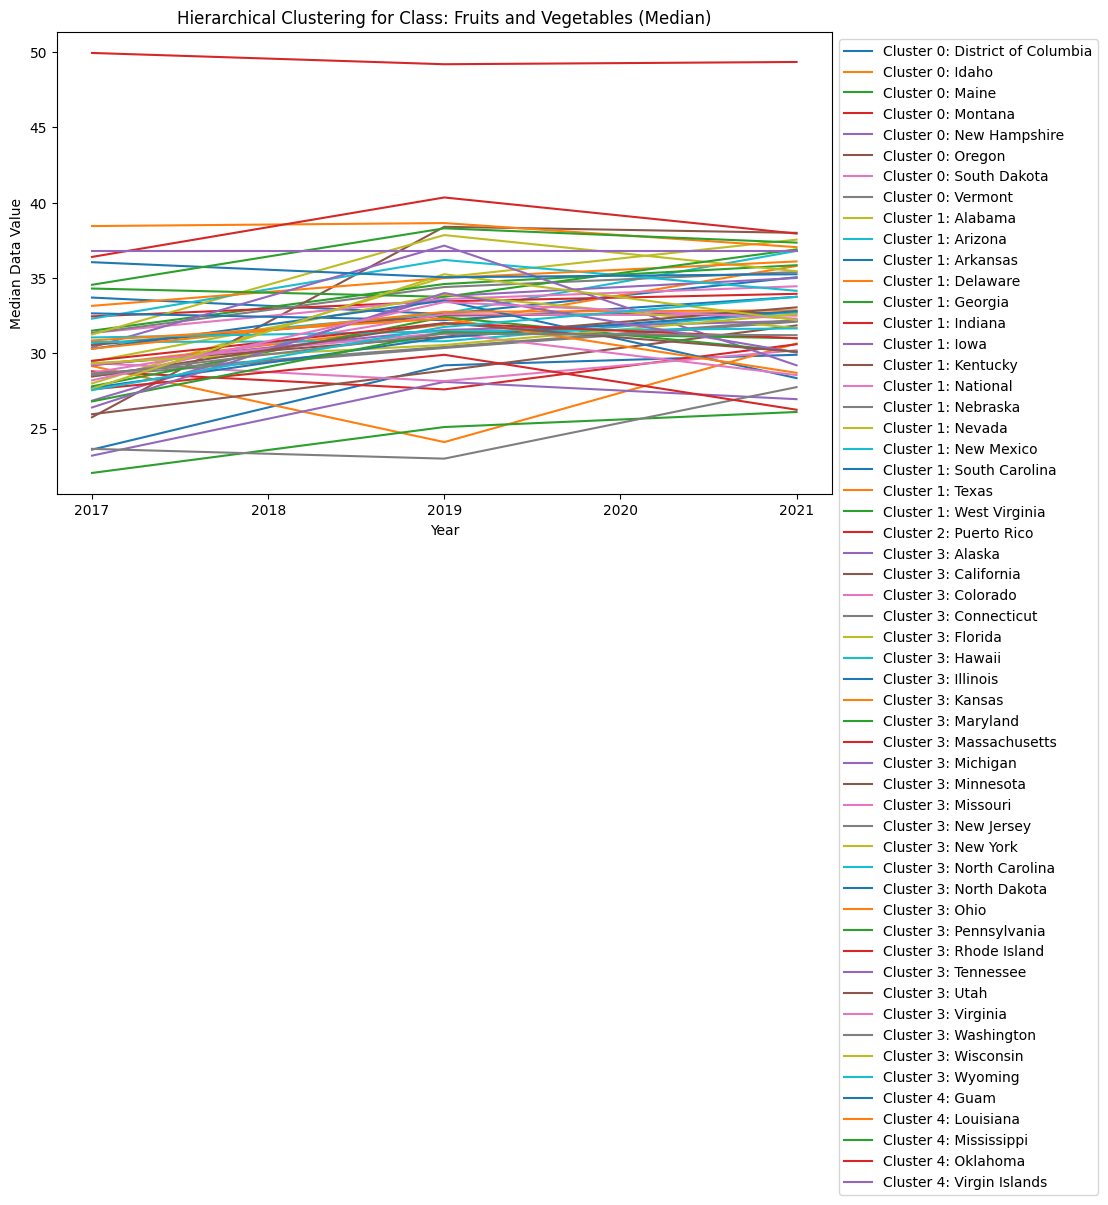

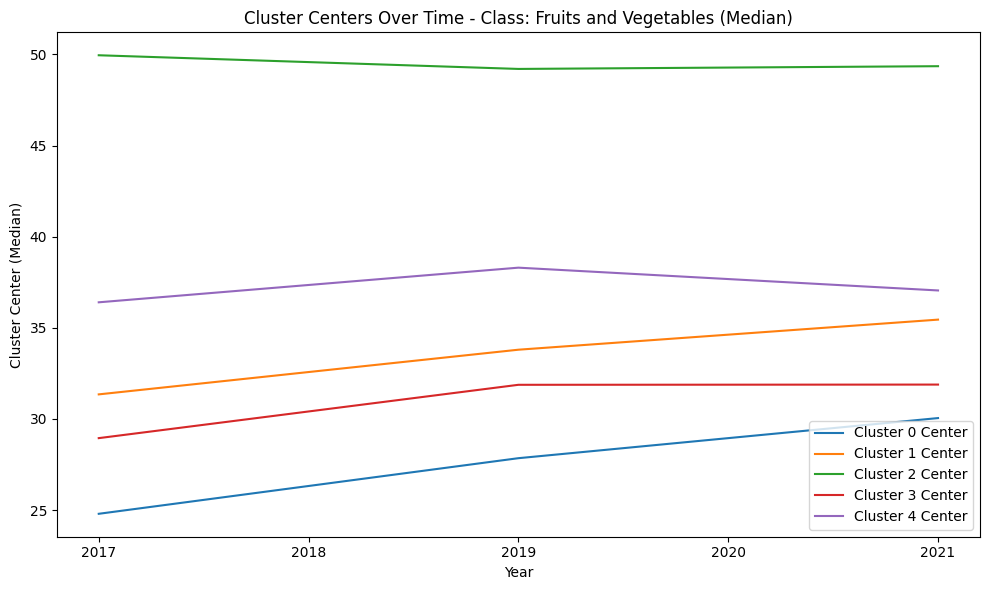

Cluster Centers for Fruits and Vegetables:
[[24.8    27.85   30.05  ]
 [31.35   33.8    35.45  ]
 [49.95   49.2    49.35  ]
 [28.95   31.875  31.8875]
 [36.4    38.3    37.05  ]]

Cluster Labels for Each Region:
                      Cluster
LocationDesc                 
Alabama                     1
Alaska                      3
Arizona                     1
Arkansas                    1
California                  3
Colorado                    3
Connecticut                 3
Delaware                    1
District of Columbia        0
Florida                     3
Georgia                     1
Guam                        4
Hawaii                      3
Idaho                       0
Illinois                    3
Indiana                     1
Iowa                        1
Kansas                      3
Kentucky                    1
Louisiana                   4
Maine                       0
Maryland                    3
Massachusetts               3
Michigan                    3
Minnesot

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Dictionary to store cluster labels and centers
cluster_labels_by_class = {}
cluster_centers_by_class = {}

# Apply Hierarchical Clustering and find cluster centers
for class_label, pivot_data in pivot_data_by_class.items():
    print(f"Processing Class: {class_label}\n")

    # Apply Hierarchical Clustering (Agglomerative)
    hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
    clusters = hc.fit_predict(pivot_data.T)

    # Store cluster labels
    cluster_labels = pd.DataFrame(clusters, index=pivot_data.columns, columns=['Cluster'])
    cluster_labels_by_class[class_label] = cluster_labels

    # Compute cluster centers (medoids) manually
    cluster_centers = []
    for cluster in np.unique(clusters):
        cluster_points = pivot_data.T[clusters == cluster]  # Get all points in cluster
        cluster_median = cluster_points.median(axis=0)  # Compute median for each year
        cluster_centers.append(cluster_median)

    cluster_centers = np.array(cluster_centers)
    cluster_centers_by_class[class_label] = cluster_centers

    # Visualize Clusters with Integer X-axis
    plt.figure(figsize=(10, 6))
    for cluster in np.unique(clusters):
        subset_columns = cluster_labels[cluster_labels["Cluster"] == cluster].index
        for region in subset_columns:
            plt.plot(pivot_data.index, pivot_data[region], label=f'Cluster {cluster}: {region}')

    plt.xlabel('Year')
    plt.ylabel('Median Data Value')
    plt.title(f'Hierarchical Clustering for Class: {class_label} (Median)')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

    # Ensure only integer years are displayed
    plt.xticks(pivot_data.index.astype(int))
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

    # Plot Cluster Centers Over Time with Integer X-axis
    plt.figure(figsize=(10, 6))
    for i, center in enumerate(cluster_centers):
        plt.plot(pivot_data.index, center, label=f'Cluster {i} Center')

    plt.xlabel('Year')
    plt.ylabel('Cluster Center (Median)')
    plt.title(f'Cluster Centers Over Time - Class: {class_label} (Median)')
    plt.legend()

    # Ensure only integer years are displayed
    plt.xticks(pivot_data.index.astype(int))
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

    print(f"Cluster Centers for {class_label}:")
    print(cluster_centers)
    print("\nCluster Labels for Each Region:")
    print(cluster_labels)
    print("\n" + "="*50 + "\n")


# **5. Intepretation/Summary**


With our data, we found that there is a general upward trend towards a less healthier lifestyle overall within the United States.

For example, our clusters revealed an upward trend towards obesity rates, indicating that unhealthy lifestyles have impacted many Americans to have higher weights. In addition, each cluster had a differing baseline level. For example, the orange line, cluster 1, consistently conveyed that those living within the region have higher obesity rates. Even those with the lower levels, cluster 2 (green line) indicated a uptick of obesity.

Cluster 1 and 4 conveyed the most impacted of all the obesity levels, conveying unhealthy lifestyles within the region. When any of the lines had a slowing down, this may indicate successful public health interventions.

Moreover, in regards to physical activity levels, there was much inconsistency. This hints at possible factors such as inconsistent data collection or external influences. One important aspect to note is that cluster 4, the purple one, remained consistent regardless. This infers that there could be stable socioeconomic factors. The rise of exercise may be as a result of post-pandemic recovery.

Lastly, we found a general increase in fruit and vegetable consumption. From 2017 to 2019, all regions showed an increase in consumption of nutritious fruits and vegetables. However, from 2019 to 2021, growth began to either slow or slightly declines. Some factors that may have influenced this would be greater awareness of nutrition's impact on health. In addition, policy changes could have influenced such factors.

Some further analysis we wish to explore would be whether socioeconomic factors influence better health outcomes.

Therefore, the clusters convey an upward trend in obesity, physical activity wanes, and fruit and vegetable intake appears to increase as time goes on.

There are significant flunctuations within two clusters in particular: Cluster 1 (orange) and Cluster 2 (red). These regions are indicative of aspects influencing their physical health.

All in all, physical activity tends to have more variance due to external factors, such as environment, social trends, and lifestyle behaviors. Much of these clusters appear to show that post-pandemic recovery emphasized a upskirt in physical activity as a result of no longer being under lockdown. However, the obesity rate continues to rise. As much as the consumption of fruits and vegetables continues to rise within the states, the obesity trend seems to indicate unhealthier lifestyle choices amongst Americans.